In [1]:
from process_edus import EDUSample

In [2]:
data = EDUSample()
path = r'../LabeledEDUS.txt'
dataset = []

for i in range(1, 6):
    X_train_vector, y_train, X_test_vector, y_test = \
                    data.split_vectorize(path, ngram=(1, i))
    dataset.append({
        'X_train': X_train_vector, 
        'y_train': y_train, 
        'X_test': X_test_vector, 
        'y_test': y_test
    })

=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 1)

                    X_train_vector shape: (1341, 361)
                    y_train shape: (1341,)
                    X_test_vector shape: (671, 361)
                    y_test shape: (671,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 2)

                    X_train_vector shape: (1341, 620)
                    y_train shape: (1341,)
                    X_test_vector shape: (671, 620)
                    y_test shape: (671,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 3)

                    X_train_vector shape: (1341, 681)
                    y_train shape: (1341,)
                    X_test_vector shape: (671, 681)
                    y_test shape: (671,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 4)

                    X_train_vector shape: (1341, 690)
                    y_train shape: (1341,)
                    X_

In [3]:
data.nzp

(1063, 1209, 949)

In [48]:
import numpy as np

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC

# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

# Performance 
from sklearn.metrics import make_scorer, classification_report, confusion_matrix

# Visualiuzations
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#### Multinomial Naive Bayes

In [ ]:
# trying for varying alphas, didn't find a lot of variation in prediction 

# acc = []
# for ngram in range(len(dataset)):
#     print('==========> NGRAM RANGE ( 1 ,', ngram+1, ')')
#     acc.append([])
#     for alpha in np.linspace(0, 2, 9):
#         print("======> alpha ", alpha)
#         mnb = MultinomialNB(alpha=alpha)
#         c_data = dataset[ngram] 
#         X_train, y_train, X_test, y_test = \
#             c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
#         mnb.fit(X_train, y_train)
#         acc[-1].append(mnb.score(X_test, y_test))

In [62]:
acc = []
preds = []
for ngram in range(len(dataset)):
    print('==========> NGRAM RANGE ( 1 ,', ngram+1, ')')
    
    mnb = MultinomialNB(alpha=1.0) 
    
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    
    mnb.fit(X_train, y_train)
    
    preds.append(mnb.predict(X_test))
    acc.append(mnb.score(X_test, y_test))

==========> NGRAM RANGE ( 1 , 1 )
==========> NGRAM RANGE ( 1 , 2 )
==========> NGRAM RANGE ( 1 , 3 )
==========> NGRAM RANGE ( 1 , 4 )
==========> NGRAM RANGE ( 1 , 5 )


Plot confusion matrices

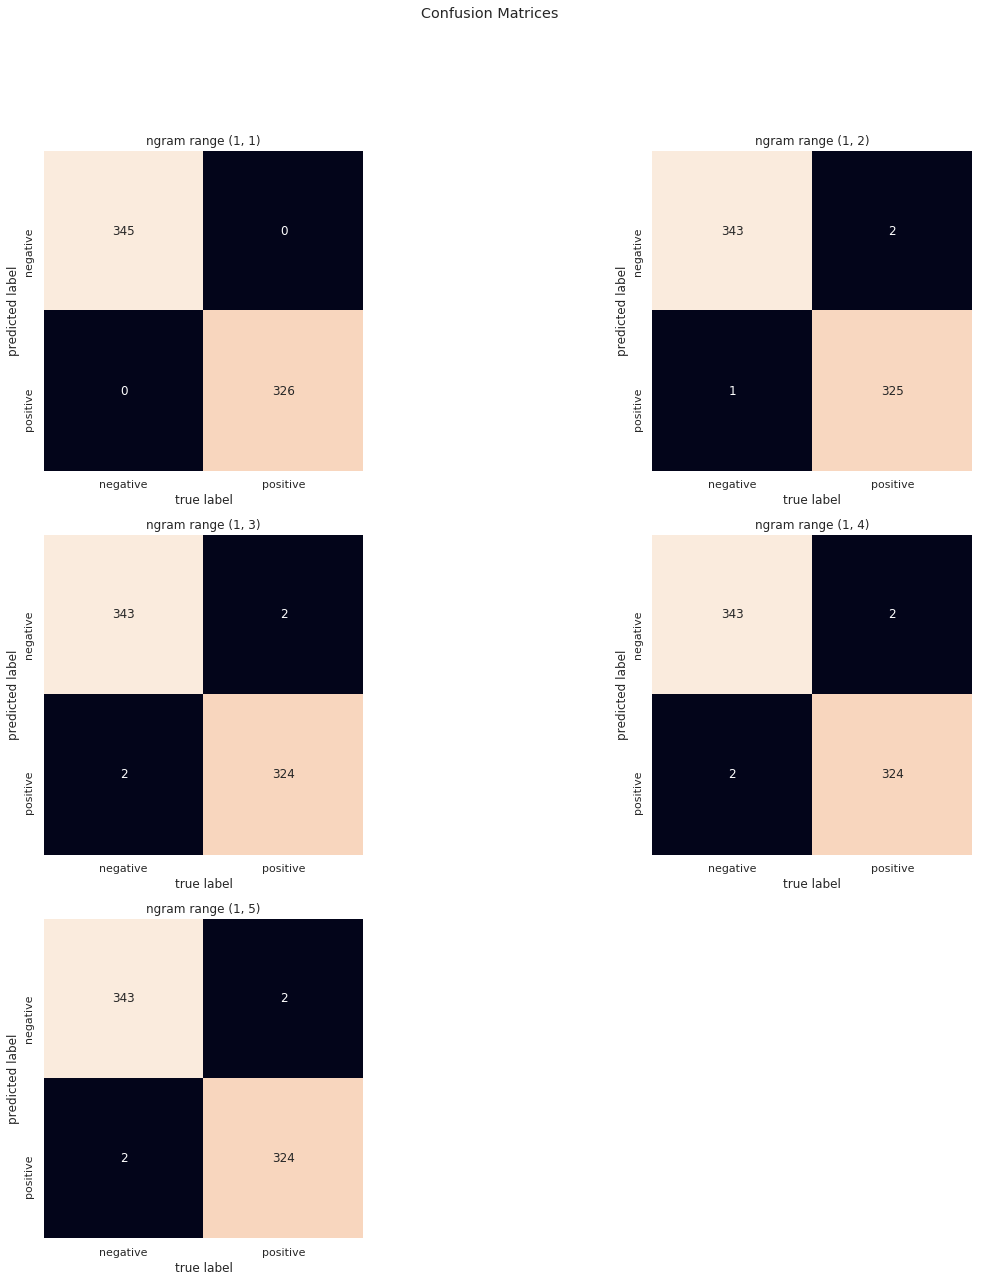

In [92]:
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Confusion Matrices')
fig.tight_layout()

for ngram in range(len(preds)):    
    axe = fig.add_subplot(3, 2, ngram+1)
    axe.set_title('ngram range (1, {})'.format(ngram+1))
    
    mat = confusion_matrix(preds[ngram], y_test)
    
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, ax=axe,
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
fig.savefig('test.png')

In [61]:
print('ngram range\t accuracy')
print('----------------------------')
for i in range(len(acc)):
    print('(1, {})\t\t {}'.format(i+1, acc[i]))
    

ngram range	 accuracy
----------------------------
(1, 1)		 1.0
(1, 2)		 0.9955290611028316
(1, 3)		 0.9940387481371088
(1, 4)		 0.9940387481371088
(1, 5)		 0.9940387481371088


In [93]:
X_train.shape

(1341, 693)